# Flocode | Engineering Insights 🌊
# 🏗️ Machine Learning for Civil and Structural Engineers: The Fundamentals

## 📑 Overview
This repository contains code samples and notebooks illustrating the application of machine learning in civil and structural engineering. 
The first notebook is for predicting concrete strength. 
New Notebooks will be added periodically as a I develop them.
The code herein serves as a practical introduction to machine learning in the engineering domain.

If you're new to Python, this might be confusing, by all means play around with it but when your ready, come visit [flocode](https://flocode.dev/).

## 🌟 Features
- 🔩 Linear Regression Model for Concrete Strength Prediction
- 🧠 Deep Learning Model for Concrete Strength Prediction


## 📝 Related Article
For a deep dive into the concepts and applications covered in this repository, check out the corresponding posts on my [Substack](https://substack.com/@flocode?utm_source=profile-page).  
* [Machine Learning for Civil and Structural Engineers | 01: The Fundamentals](https://flocode.substack.com/p/machine-learning-for-civil-and-structural)
* [Machine Learning for Civil and Structural Engineers | 02: Linear Regression]()

## 🚀 Quick Start
1. Clone the repo
2. Install requirements: `pip install -r requirements.txt`
3. Run Jupyter Notebook: `jupyter notebook`

### ☁️ Using Cloud-Based Notebooks
If you prefer to experiment with the notebooks without installing anything on your local machine, consider using one of these cloud-based platforms:

- **Google Colab:** A free, cloud-based version of Jupyter Notebook. Great for experimenting with the notebooks without any setup. Simply upload the notebook files to Colab. [Google Colab](https://colab.research.google.com/).

- **Kaggle Kernels:** Provides a cloud-based Jupyter Notebook environment. It also offers free access to GPUs. Useful for trying out the notebooks and for more intensive computations. [Kaggle Kernels](https://www.kaggle.com/kernels).

- **GitHub Codespaces:** An integrated development environment within GitHub that allows you to work with repositories in a cloud-based VS Code interface. It's a perfect way to experiment with the code if you're already comfortable with GitHub. [GitHub Codespaces](https://github.com/features/codespaces).


## 🤝 Contributions
Feel free to fork the repository and make contributions. For any bugs or feature requests, please open an issue.


In [1]:
import pandas as pd

# Data

I took the sample concrete data from [Kaggle](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking).

In [2]:
df_concrete = pd.read_csv('concrete_data.csv')  # replace with your csv file path

# Display the first few rows to understand its structure
df_concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## Linear Regression Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and Target
X = df_concrete.drop('Strength', axis=1)
y = df_concrete['Strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Mean Squared Error
print('Mean Squared Error:', mse)

Mean Squared Error: 95.97094009110683


## Deep Learning Model

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Build the deep learning model
dl_model = Sequential()
dl_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dense(1))

# Compile the model
dl_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
dl_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions and evaluate the model
y_pred_dl = dl_model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred_dl)

print("Deep Learning Model MSE:", mse_dl)

Epoch 1/50
26/26 [==============================] - 0s 1ms/step - loss: 337.4607
Epoch 2/50
26/26 [==============================] - 0s 920us/step - loss: 128.5839
Epoch 3/50
26/26 [==============================] - 0s 879us/step - loss: 108.4444
Epoch 4/50
26/26 [==============================] - 0s 800us/step - loss: 128.1777
Epoch 5/50
26/26 [==============================] - 0s 680us/step - loss: 95.6743
Epoch 6/50
26/26 [==============================] - 0s 760us/step - loss: 94.4098
Epoch 7/50
26/26 [==============================] - 0s 760us/step - loss: 87.9716
Epoch 8/50
26/26 [==============================] - 0s 722us/step - loss: 79.0382
Epoch 9/50
26/26 [==============================] - 0s 724us/step - loss: 74.8386
Epoch 10/50
26/26 [==============================] - 0s 720us/step - loss: 80.8613
Epoch 11/50
26/26 [==============================] - 0s 712us/step - loss: 68.5526
Epoch 12/50
26/26 [==============================] - 0s 721us/step - loss: 74.3277
Epoch 13/50

# Plotting and Model Comparisons

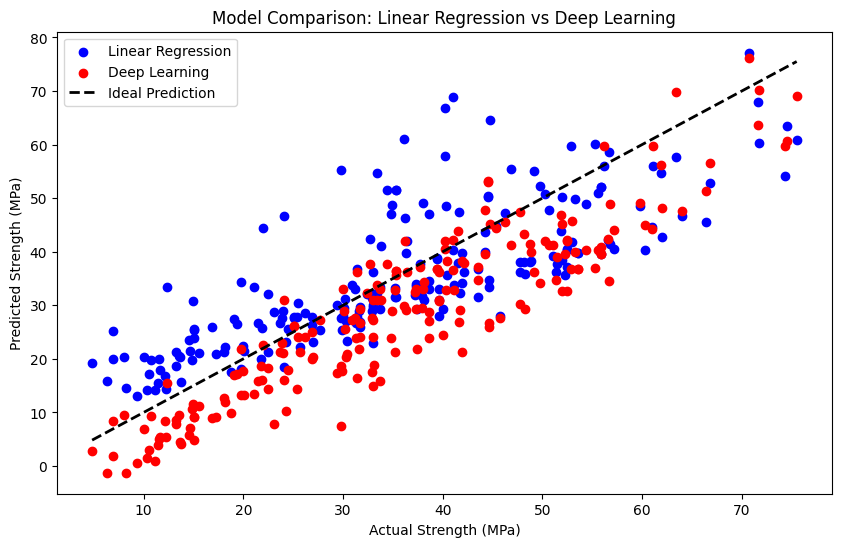

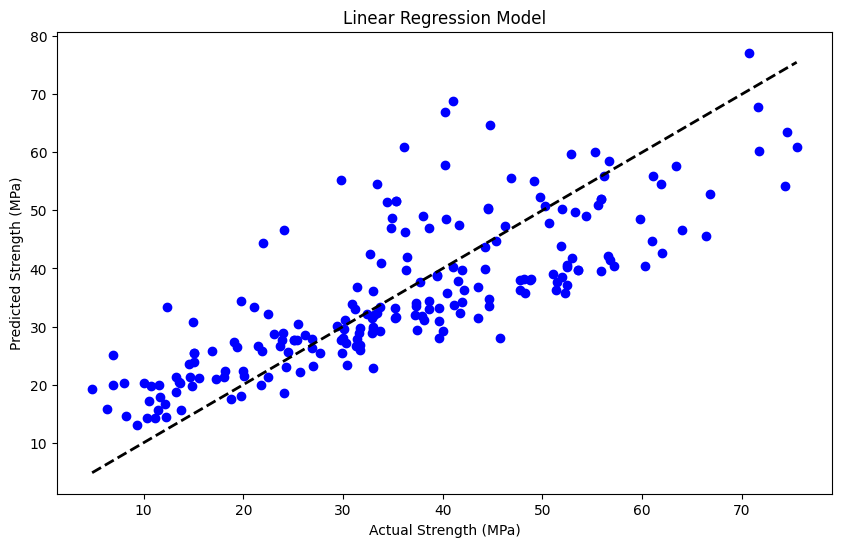

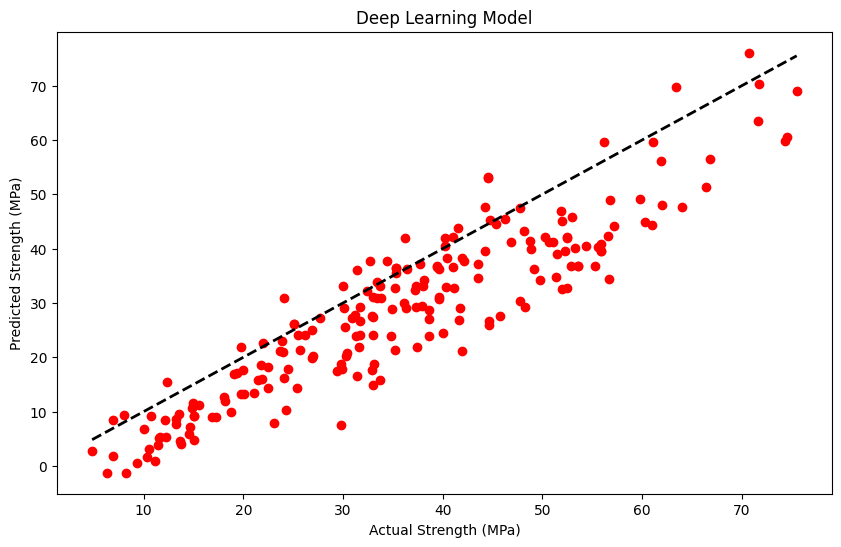

In [5]:
import matplotlib.pyplot as plt

# Linear Regression Predictions
y_pred_lr = model.predict(X_test)

# Deep Learning Predictions
# Assuming 'y_pred_dl' contains predictions from the deep learning model

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_dl, color='red', label='Deep Learning')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.legend()
plt.title('Model Comparison: Linear Regression vs Deep Learning')
plt.show()

# Linear Regression Predictions
# Assuming 'y_pred_lr' contains predictions from the linear regression model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Linear Regression Model')
plt.show()

# Deep Learning Predictions
# Assuming 'y_pred_dl' contains predictions from the deep learning model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dl, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Deep Learning Model')
plt.show()

